## Importing Libraries

In [1123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as SMSSpamCollection.txt
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics


from sklearn.metrics import precision_recall_curve,precision_score,recall_score

In [1124]:
import warnings
warnings.filterwarnings('ignore')

In [1125]:
## Importing and Reading the Data Set
lead_data = pd.read_csv('Leads.csv')
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1126]:
lead_data.shape

(9240, 37)

In [1127]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [1128]:
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [1129]:
## As we can see there are Select values in the multiple columns, therefore we will replace select value with Null values
lead_data = lead_data.replace('Select',np.nan)

In [1130]:
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1131]:
## Checking Data Balance
Conversion_percentage = lead_data['Converted'].sum()/len(lead_data)*100

In [1132]:
round(Conversion_percentage,2)

38.54

In [1133]:
lead_data.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [1134]:
## Dropping columns which have only 1 variable 
lead_data = lead_data.drop(['Magazine','Update me on Supply Chain Content','Receive More Updates About Our Courses','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1)

## Treating Missing/ Null Values

In [1135]:
## Checking Null values in Every columns
round(lead_data.isnull().sum()/len(lead_data),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Newspaper Article                                 0.0
X Education Forums          

In [1136]:
## Dropping columns having more than 40% of null values

null_above_40 = lead_data.columns[round(lead_data.isnull().sum()/len(lead_data),2)*100>=40]
lead_data = lead_data.drop(null_above_40,axis=1)

In [1137]:
lead_data.shape

(9240, 24)

In [1138]:
## Checking Null values in Every columns again
round(lead_data.isnull().sum()/len(lead_data),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Newspaper Article                                 0.0
X Education Forums                                0.0
Newspaper                   

In [1139]:
# Fixing Tags Columns- Replacign Null values with Unknown values
lead_data.Tags = lead_data.Tags.replace(np.nan,'Unknown')

In [1140]:
## Fixing Country columns
lead_data.Country.value_counts(normalize=True,dropna=False)

Country
India                   0.702597
NaN                     0.266342
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Bahrain                 0.000758
Hong Kong               0.000758
Oman                    0.000649
France                  0.000649
unknown                 0.000541
Kuwait                  0.000433
South Africa            0.000433
Canada                  0.000433
Nigeria                 0.000433
Germany                 0.000433
Sweden                  0.000325
Philippines             0.000216
Uganda                  0.000216
Italy                   0.000216
Bangladesh              0.000216
Netherlands             0.000216
Asia/Pacific Region     0.000216
China                   0.000216
Belgium                 0.000216
Ghana                   0.000216
Kenya                   0.000108
Sr

In [1141]:
## As around 20% values belong to Null values, Therefore we will impute 'Unknown' value in the country column.
## Plus we have seen , most of the entries around 70% are from India,26% from Unkonwn and rest of the countries have 4% so we can create a seperate
## variable named 'Other Countries' where we can club these 4% values for better analysis.

In [1142]:
lead_data.Country = lead_data.Country.replace(np.nan,'Unknown')

In [1143]:
## Function for changing Other countries to single variable 'Outside'
def country_change(x):
    if x== 'India':
        return 'India'
    elif x=='Unknown':
        return 'Unknown'
    else:
        return 'Outside India'

In [1144]:
lead_data.Country = lead_data.apply(lambda x: country_change(x.Country),axis=1)

In [1145]:
lead_data.Country.value_counts()

Country
India            6492
Unknown          2461
Outside India     287
Name: count, dtype: int64

In [1146]:
## Fixing Specialization column
lead_data.Specialization.value_counts(normalize=True,dropna=False)

Specialization
NaN                                  0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Travel and Tourism                   0.021970
Media and Advertising                0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: proportion, dtype: float64

In [1147]:
## As 36% values are not available, We will create a seperate value of 'Unknown' specialization for 'Nan' value
lead_data.Specialization = lead_data.Specialization.replace(np.nan,'Unknown')

In [1148]:
# Fixing 'What is your current occupation' column
lead_data ['What is your current occupation'].value_counts(dropna=False,normalize=True)

What is your current occupation
Unemployed              0.606061
NaN                     0.291126
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: proportion, dtype: float64

In [1149]:
## As 29% values are not available, We will create a seperate value of 'Not Known' specialization for 'Nan' value
lead_data ['What is your current occupation']=lead_data ['What is your current occupation'].replace(np.nan,'Not Known')

In [1150]:
### Fixing 'What matters most to you in choosing a course' column
lead_data['What matters most to you in choosing a course'].value_counts(dropna=False,normalize=True)

What matters most to you in choosing a course
Better Career Prospects      0.706494
NaN                          0.293182
Flexibility & Convenience    0.000216
Other                        0.000108
Name: proportion, dtype: float64

In [1151]:
## We can drop this column as most of the candidates generally enroll or enquire about any course for Better Career Prospects only
## So, here if we consider Null values as 'Bette Career Prospects' , then we have around 99% of candidates.

In [1152]:
lead_data.drop('What matters most to you in choosing a course',axis=1,inplace=True)

In [1153]:
## Total Visits column
lead_data['TotalVisits'].value_counts(normalize=True,dropna=False)

TotalVisits
0.0      0.236905
2.0      0.181818
3.0      0.141342
4.0      0.121212
5.0      0.084740
6.0      0.050433
1.0      0.042749
7.0      0.033442
8.0      0.024242
9.0      0.017749
NaN      0.014827
10.0     0.012338
11.0     0.009307
13.0     0.005195
12.0     0.004870
14.0     0.003896
16.0     0.002273
15.0     0.001948
17.0     0.001732
18.0     0.001623
20.0     0.001299
19.0     0.000974
21.0     0.000649
23.0     0.000649
24.0     0.000541
25.0     0.000541
27.0     0.000541
22.0     0.000325
29.0     0.000216
28.0     0.000216
26.0     0.000216
141.0    0.000108
55.0     0.000108
30.0     0.000108
43.0     0.000108
74.0     0.000108
41.0     0.000108
54.0     0.000108
115.0    0.000108
251.0    0.000108
32.0     0.000108
42.0     0.000108
Name: proportion, dtype: float64

In [1154]:
lead_data['TotalVisits'].mean()

3.445237833681204

In [1155]:
lead_data['TotalVisits'].median()

3.0

In [1156]:
## As mean and median values of total visits is around 3.0 and around 1.4% of the data has missing values, we can impute data
## which is missing with mean value

In [1157]:
lead_data.TotalVisits = lead_data.TotalVisits.replace(np.nan,lead_data['TotalVisits'].mean())

In [1158]:
### Page Views Per Visit column
lead_data['Page Views Per Visit'].mean()

2.3628199494672084

In [1159]:
lead_data['Page Views Per Visit'].median()

2.0

In [1160]:
## As mean and median values of Page Views Per Visit is approximately same and around 1% of the data has missing values, we can impute data
## which is missing with mean value

In [1161]:
lead_data['Page Views Per Visit']= lead_data['Page Views Per Visit'].replace(np.nan,lead_data['Page Views Per Visit'].mean())

In [1162]:
## Last Activity column
lead_data ['Last Activity'].value_counts(normalize=True,dropna=False)

Last Activity
Email Opened                    0.371970
SMS Sent                        0.297078
Olark Chat Conversation         0.105303
Page Visited on Website         0.069264
Converted to Lead               0.046320
Email Bounced                   0.035281
Email Link Clicked              0.028896
Form Submitted on Website       0.012554
NaN                             0.011147
Unreachable                     0.010065
Unsubscribed                    0.006602
Had a Phone Conversation        0.003247
Approached upfront              0.000974
View in browser link Clicked    0.000649
Email Received                  0.000216
Email Marked Spam               0.000216
Visited Booth in Tradeshow      0.000108
Resubscribed to emails          0.000108
Name: proportion, dtype: float64

In [1163]:
## Very less percent around 1% only data has been missing , we can impute this with mode of the column ie Email Opened.

In [1164]:
lead_data ['Last Activity'].mode()

0    Email Opened
Name: Last Activity, dtype: object

In [1165]:
lead_data ['Last Activity'] = lead_data ['Last Activity'].replace(np.nan,'Email Opened')

In [1166]:
lead_data ['Last Activity'].value_counts(normalize=True,dropna=False)

Last Activity
Email Opened                    0.383117
SMS Sent                        0.297078
Olark Chat Conversation         0.105303
Page Visited on Website         0.069264
Converted to Lead               0.046320
Email Bounced                   0.035281
Email Link Clicked              0.028896
Form Submitted on Website       0.012554
Unreachable                     0.010065
Unsubscribed                    0.006602
Had a Phone Conversation        0.003247
Approached upfront              0.000974
View in browser link Clicked    0.000649
Email Received                  0.000216
Email Marked Spam               0.000216
Visited Booth in Tradeshow      0.000108
Resubscribed to emails          0.000108
Name: proportion, dtype: float64

In [1167]:
lead_data.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                               36
Do Not Email                               0
Do Not Call                                0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Country                                    0
Specialization                             0
What is your current occupation            0
Search                                     0
Newspaper Article                          0
X Education Forums                         0
Newspaper                                  0
Digital Advertisement                      0
Through Recommendations                    0
Tags                                       0
A free copy of Mastering The Interview     0
Last Notab

In [1168]:
## Lead Source Column
lead_data['Lead Source'].value_counts(normalize=True,dropna=False)

Lead Source
Google               0.310390
Direct Traffic       0.275216
Olark Chat           0.189935
Organic Search       0.124892
Reference            0.057792
Welingak Website     0.015368
Referral Sites       0.013528
Facebook             0.005952
NaN                  0.003896
bing                 0.000649
google               0.000541
Click2call           0.000433
Press_Release        0.000216
Social Media         0.000216
Live Chat            0.000216
youtubechannel       0.000108
testone              0.000108
Pay per Click Ads    0.000108
welearnblog_Home     0.000108
WeLearn              0.000108
blog                 0.000108
NC_EDM               0.000108
Name: proportion, dtype: float64

In [1169]:
### Most of the values are of Google for Lead Source, therefore we will impute missing values with Google in this column which are around 0.3%

In [1170]:
lead_data['Lead Source'] = lead_data['Lead Source'].replace(np.nan,'Google')

In [1171]:
## In this column we have seen there are two entries with google and Google , both are same therefore we will replace 'google' 
## with 'Google'
lead_data['Lead Source'] = lead_data['Lead Source'].replace('google','Google')

In [1172]:
## Dropping Prospect ID column as it does not have any relevance in our analysis
lead_data.drop('Prospect ID',axis=1,inplace=True)

In [1173]:
## Dropping Lead Number column as it does not have any relevance in our analysis
lead_data.drop('Lead Number',axis=1,inplace=True)

In [1174]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Do Not Call                             9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9240 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9240 non-null   float64
 8   Last Activity                           9240 non-null   object 
 9   Country                                 9240 non-null   object 
 10  Specialization                          9240 non-null   obje

## Exploratory Data Analysis

In [1175]:
num_col = lead_data.select_dtypes(include='number').columns.tolist()
cat_col = lead_data.select_dtypes(exclude='number').columns.tolist()

In [1176]:
num_col

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

In [1177]:
cat_col

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Tags',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

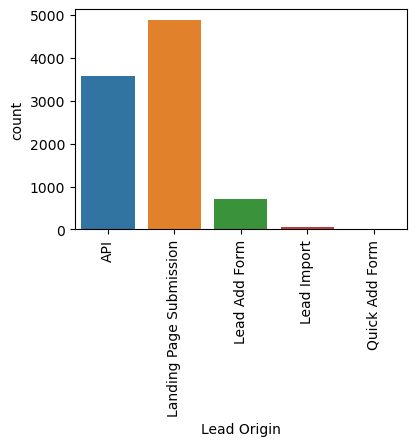

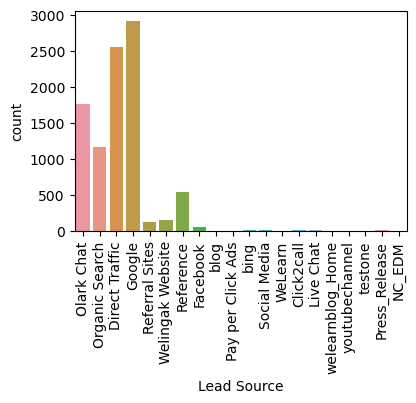

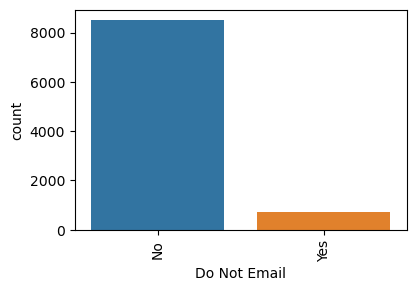

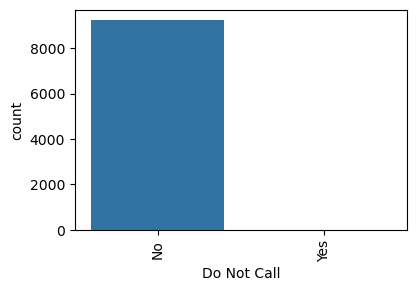

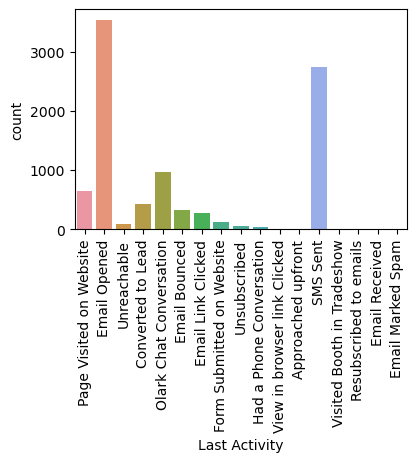

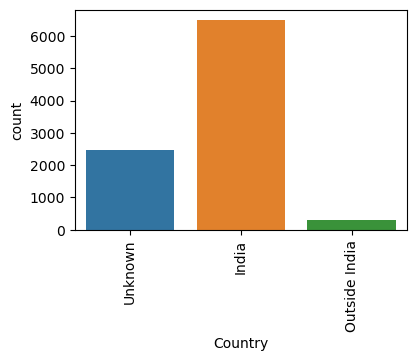

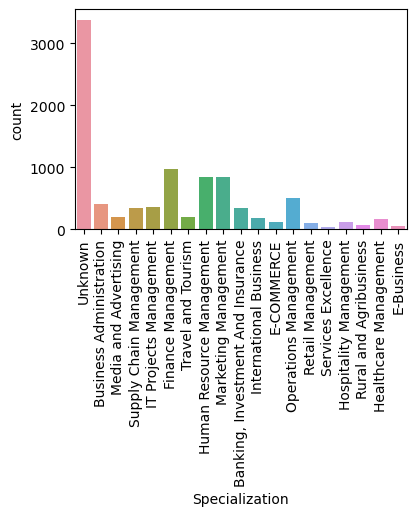

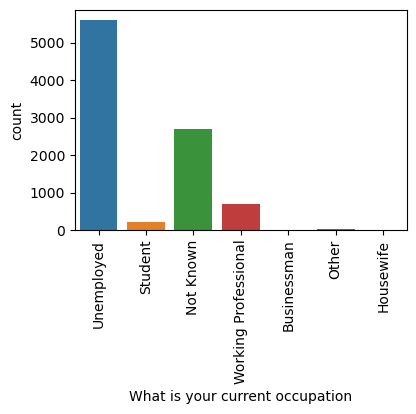

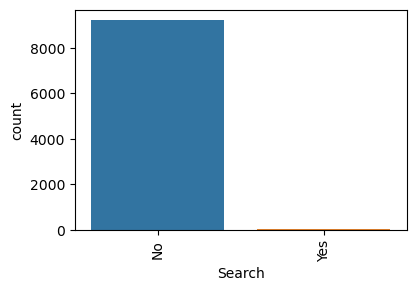

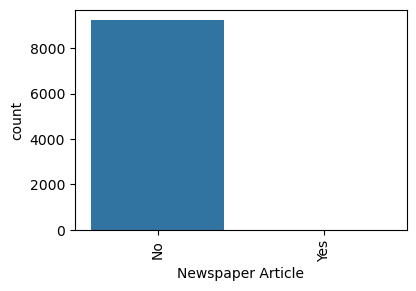

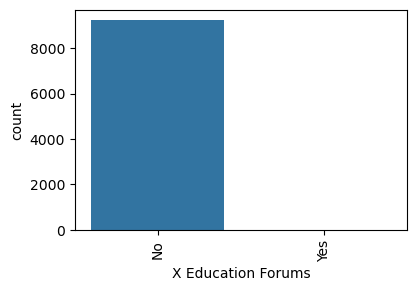

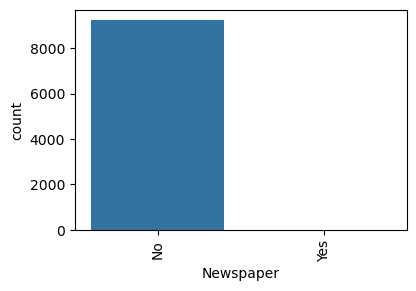

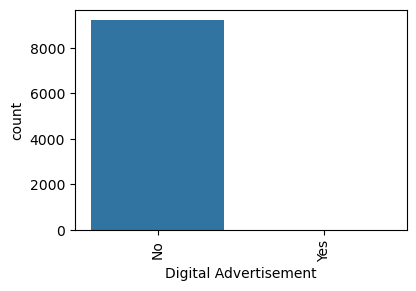

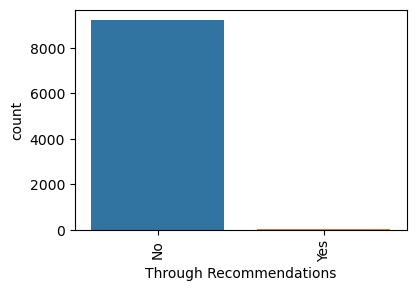

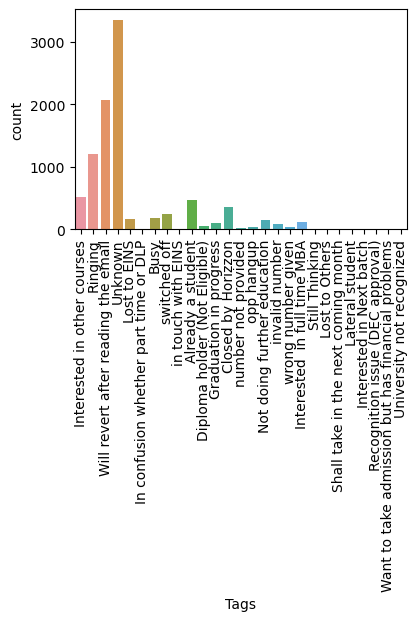

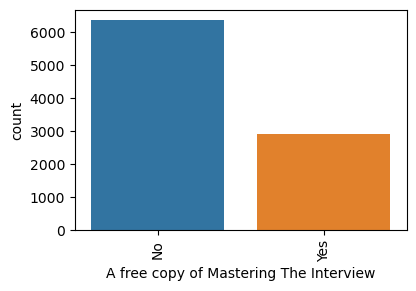

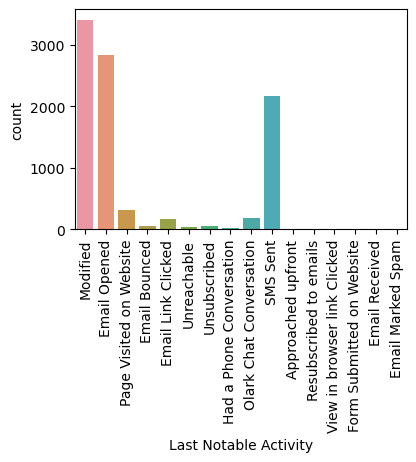

In [1178]:

count=1
for i in cat_col:
    plt.figure(figsize=(30,20))
    plt.subplot(6,6,count)
    sns.countplot(x=lead_data[i])
    plt.xticks(rotation=90)
    plt.show()
    count=count+1

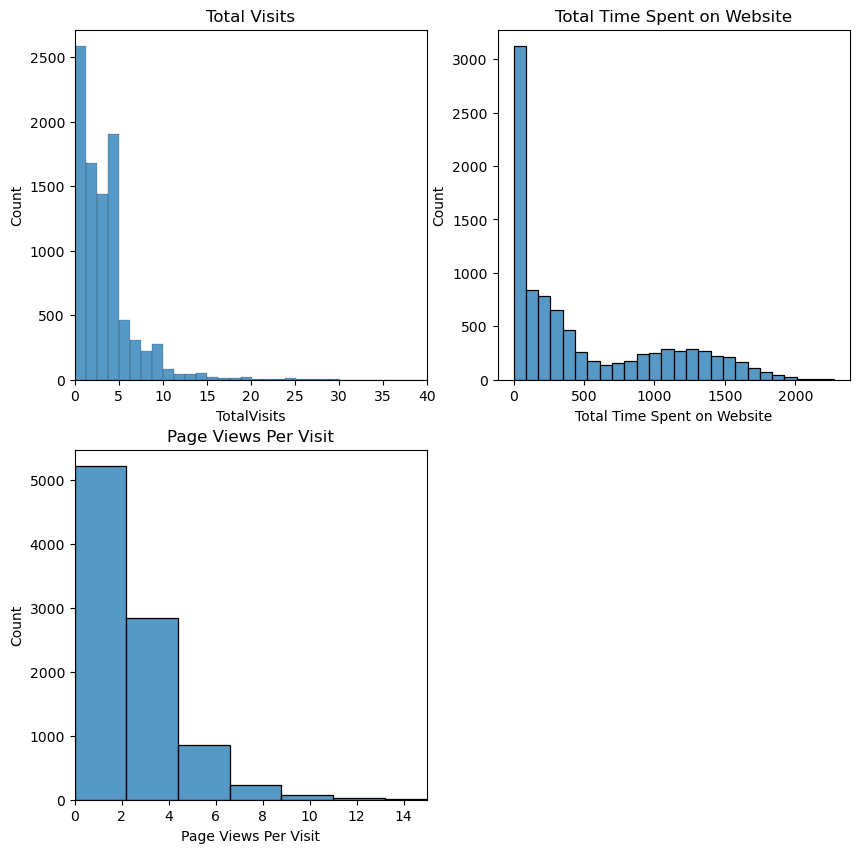

In [1179]:
## Plotting hist plots for numerical variables
plt.figure(figsize = (10,10))

plt.subplot(2,2,1)
sns.histplot(lead_data['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,40)

plt.subplot(2,2,2)
sns.histplot(lead_data['Total Time Spent on Website'])
plt.title('Total Time Spent on Website')

plt.subplot(2,2,3)
sns.histplot(lead_data['Page Views Per Visit'],bins=25)
plt.title('Page Views Per Visit')
plt.xlim(0,15)

plt.show()

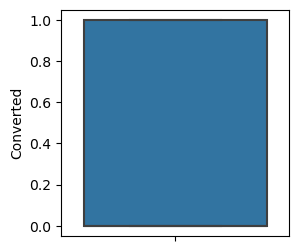

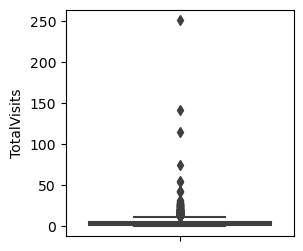

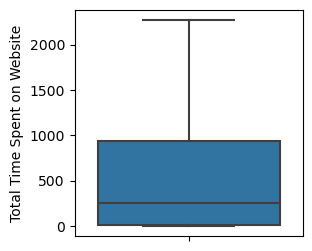

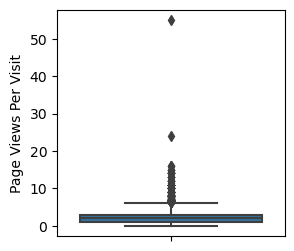

In [1180]:
## Plotting Box plot for numerical Variables

count=1
for i in num_col:
    plt.figure(figsize=(10,10))
    plt.subplot(3,3,count)
    sns.boxplot(y=lead_data[i])
    plt.show()
    count=count+1

In [1181]:
lead_data.describe(percentiles=[0,0.25,0.5,0.75,0.90,0.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.445238,487.698268,2.362820
std,0.486714,4.818723,548.021466,2.145333
min,0.000000,0.000000,0.000000,0.000000
0%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
90%,1.000000,7.000000,1380.000000,5.000000
99%,1.000000,17.000000,1840.610000,9.000000


In [1182]:
## We can observe from Box plot, there are  outliers present 'TotalVisits' 'PageViews'in all the columns except 
## Therefore , It would be better if we handle the outliers here and move ahead with our analysis

In [1183]:
## Handling of Outliers
lead_data= lead_data[~(lead_data['TotalVisits']>17)]

In [1184]:
lead_data = lead_data[~(lead_data['Page Views Per Visit']>9)]

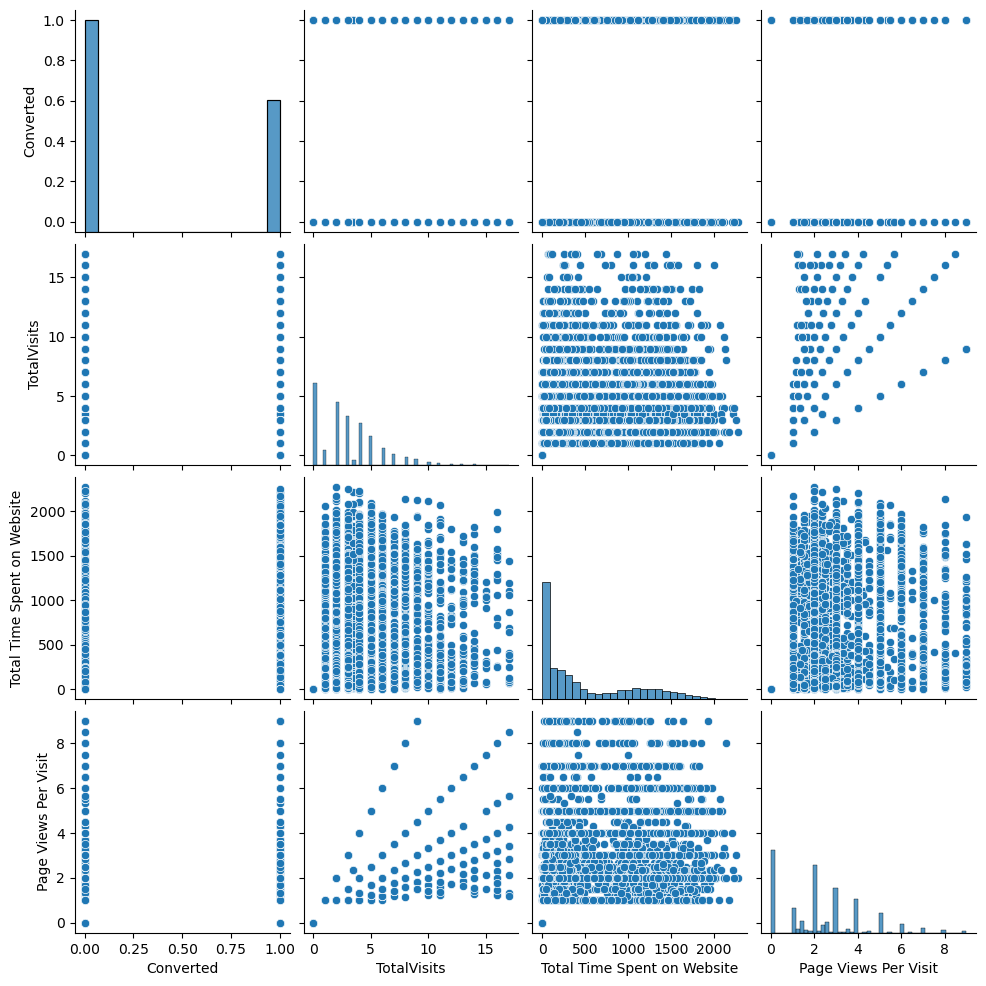

In [1185]:
sns.pairplot(lead_data)
plt.show()

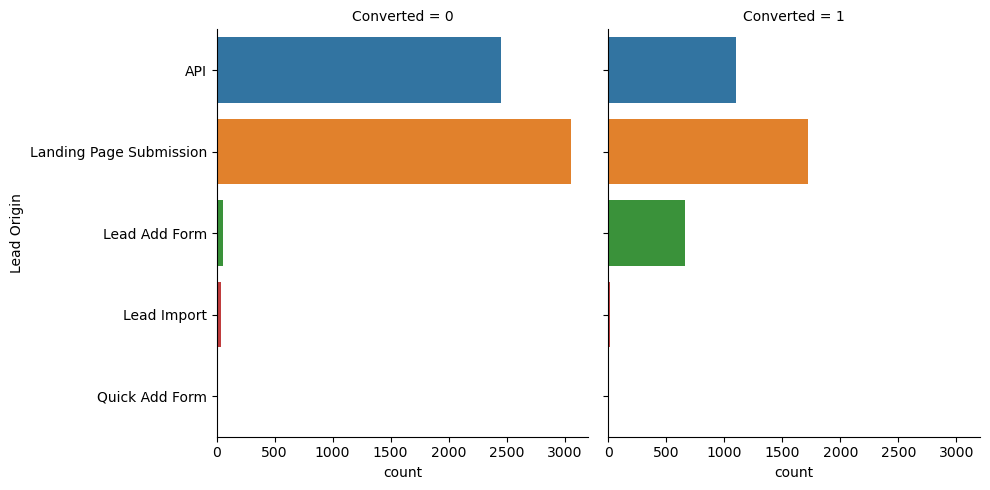

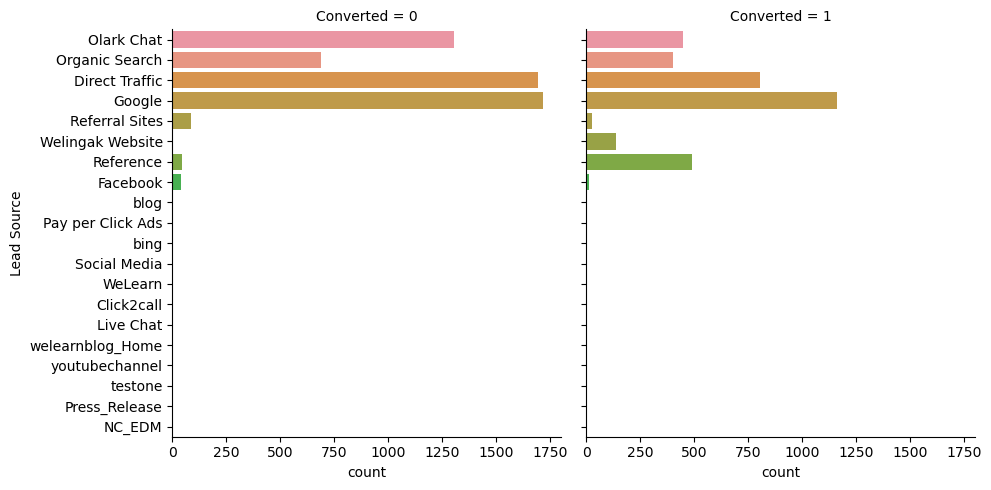

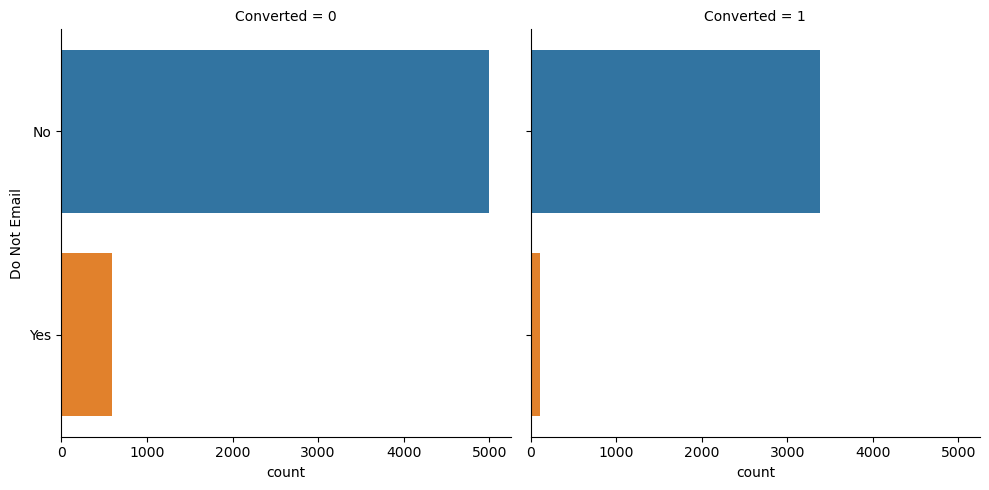

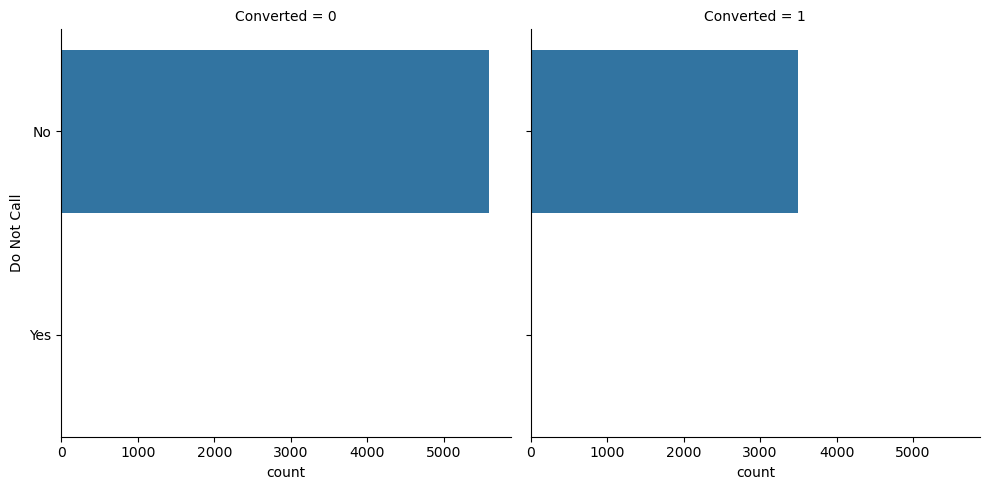

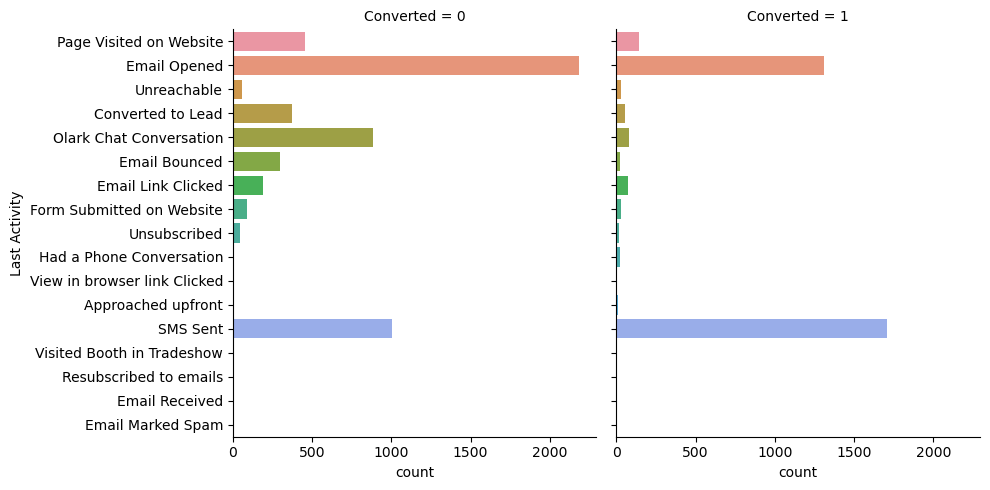

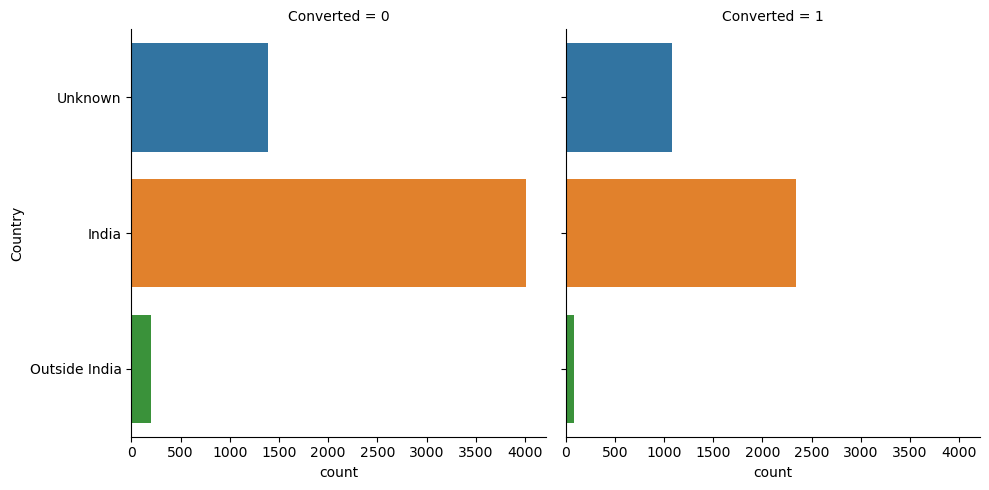

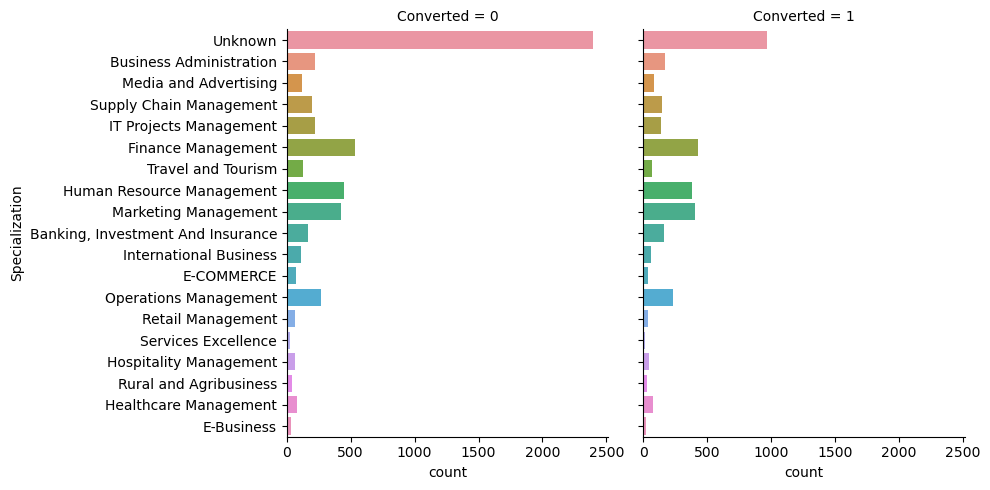

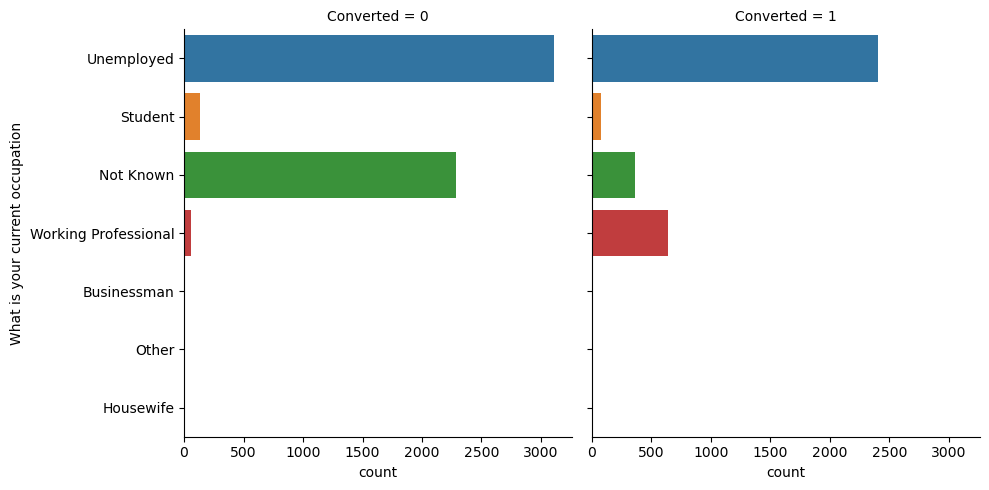

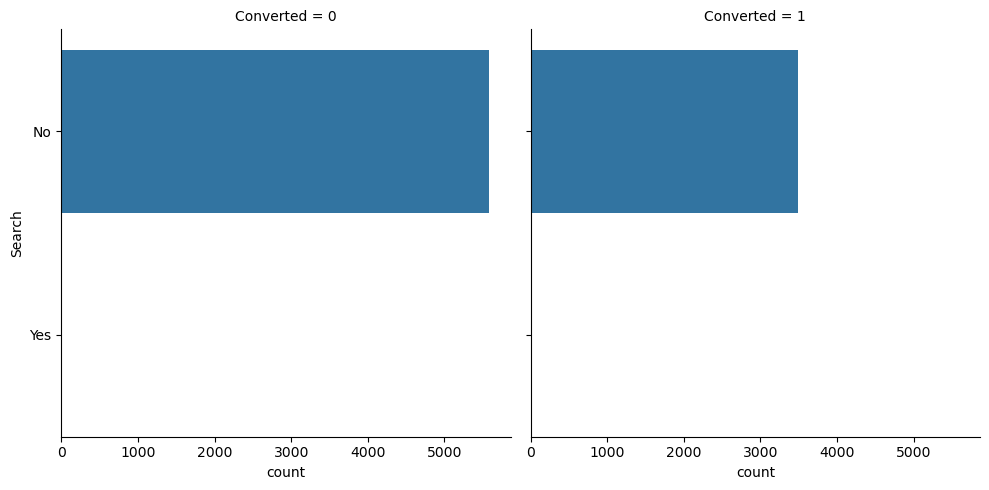

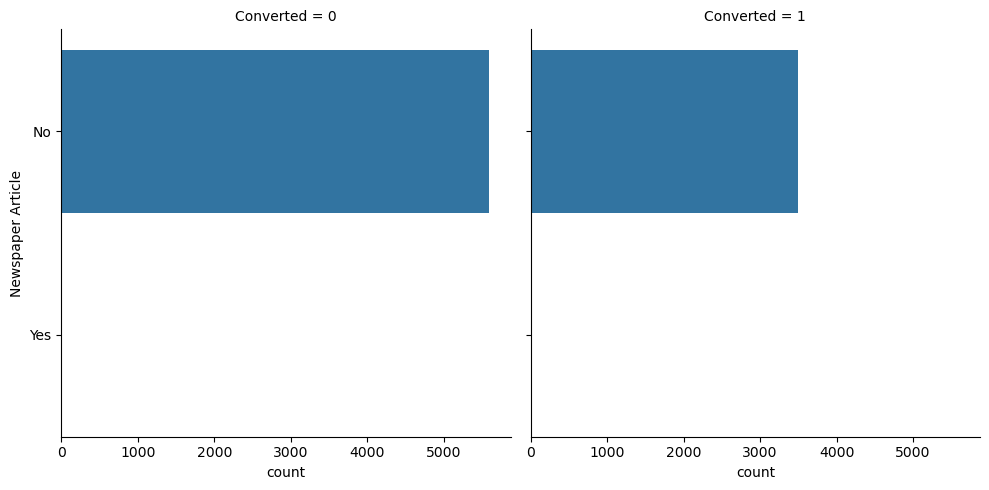

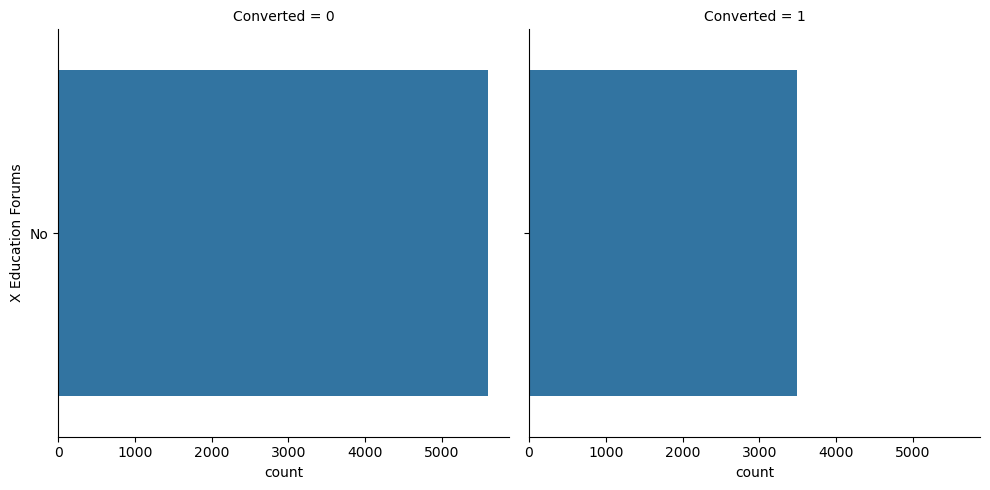

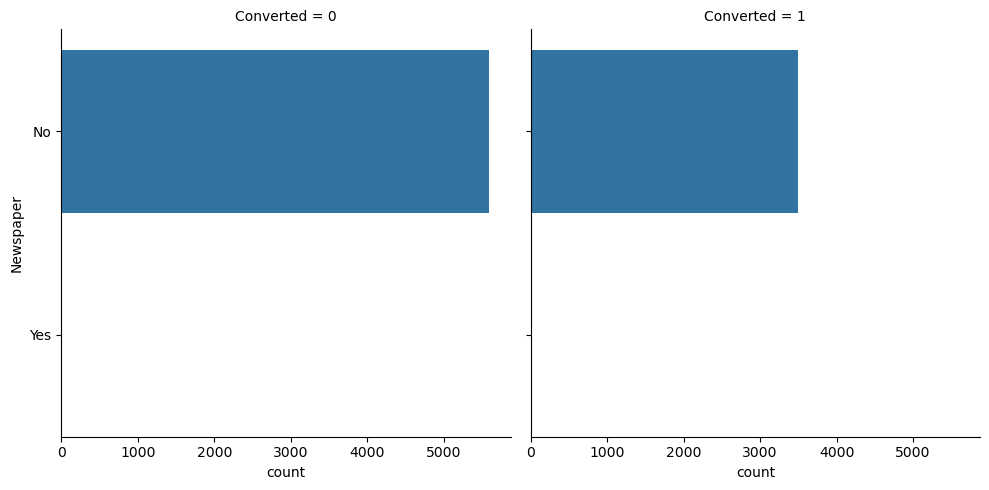

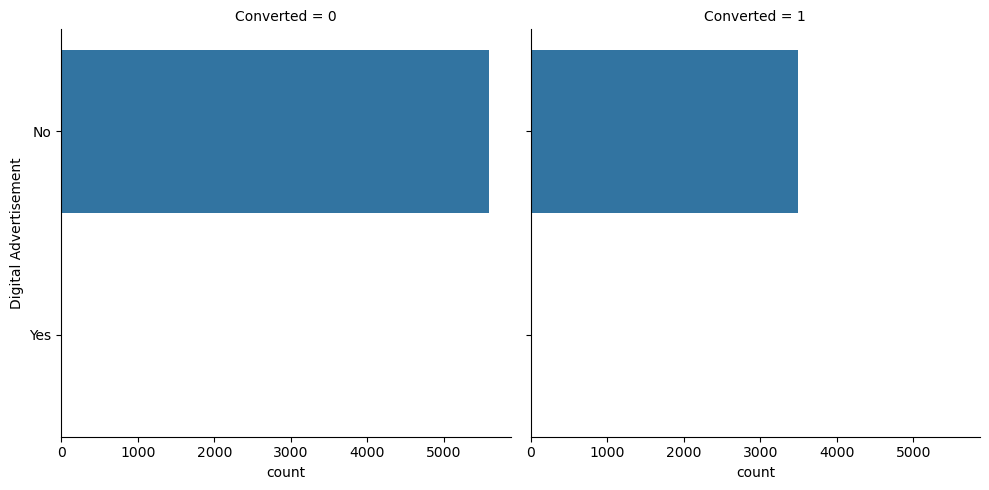

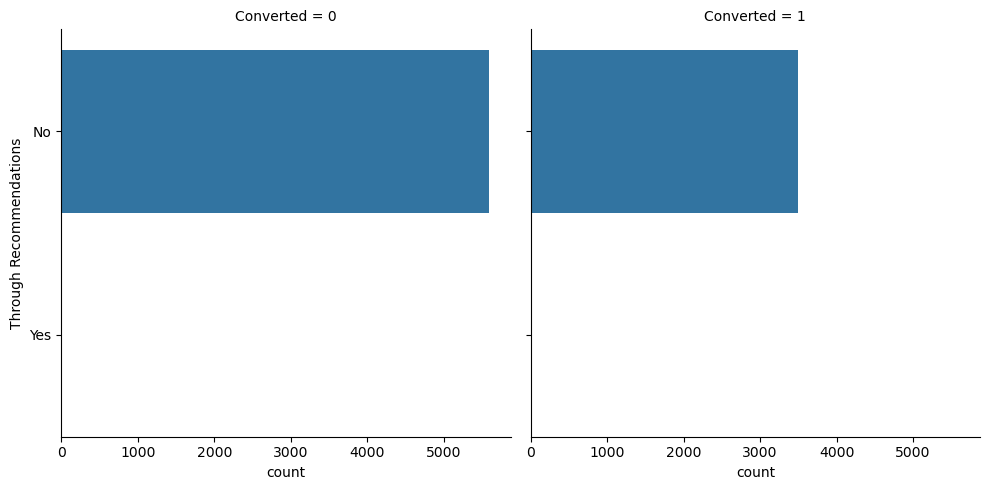

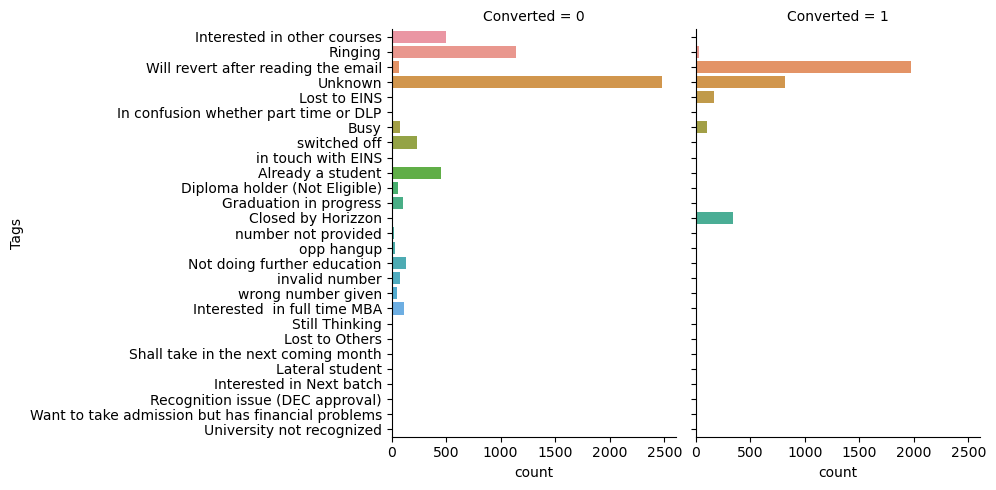

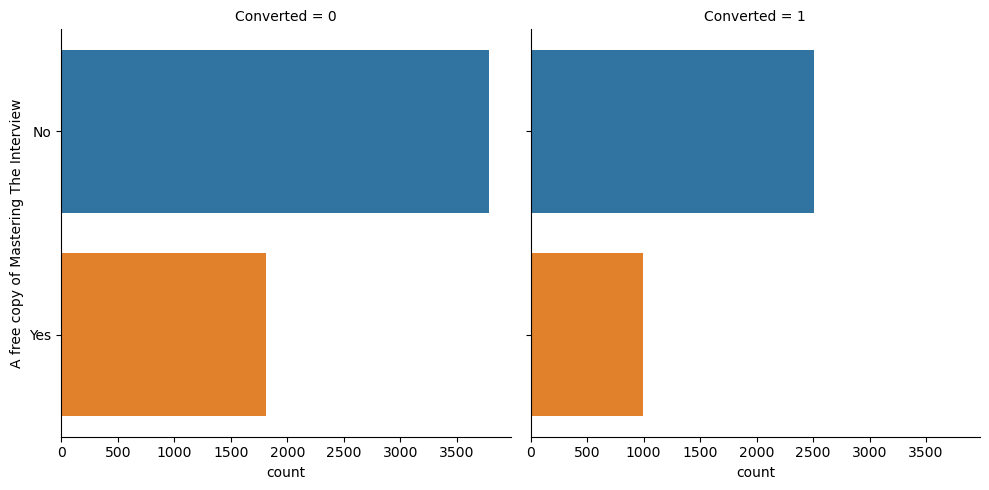

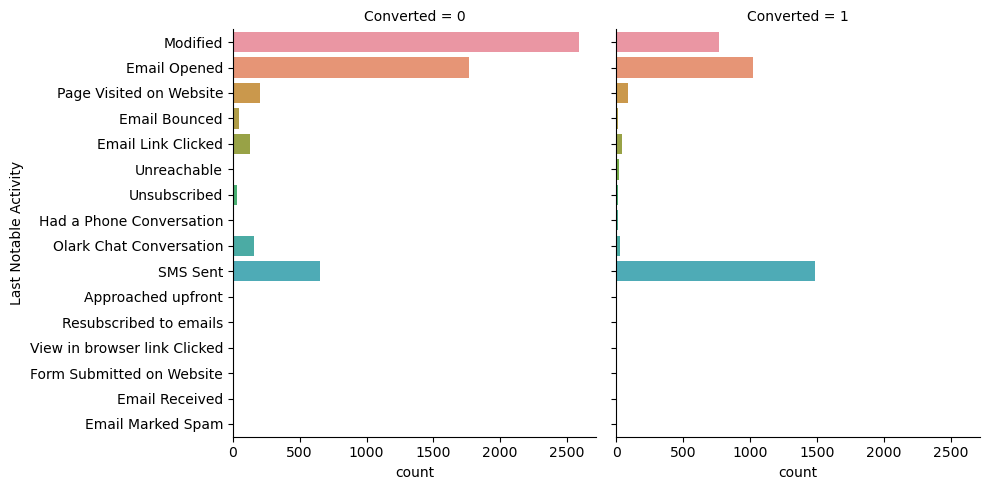

In [1186]:
for c in cat_col:
    sns.catplot(col='Converted' ,y=c, data=lead_data, kind="count")
    plt.show()

In [1187]:
lead_data.nunique()

Lead Origin                                  5
Lead Source                                 20
Do Not Email                                 2
Do Not Call                                  2
Converted                                    2
TotalVisits                                 19
Total Time Spent on Website               1720
Page Views Per Visit                        67
Last Activity                               17
Country                                      3
Specialization                              19
What is your current occupation              7
Search                                       2
Newspaper Article                            2
X Education Forums                           1
Newspaper                                    2
Digital Advertisement                        2
Through Recommendations                      2
Tags                                        27
A free copy of Mastering The Interview       2
Last Notable Activity                       16
dtype: int64

## Creating Dummy Variables

In [1189]:
# Creating dummy variables in categorical columns which have multiple values

dummy  = pd.get_dummies(lead_data[cat_col],drop_first=True,dtype=int)
lead_data = pd.concat([lead_data,dummy],axis=1)

In [1190]:
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unknown,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,0,0,1,0,0,0,0,0,0,0


In [1191]:
## Now dropping columns whose dummy variables we have created
lead_data = lead_data.drop(cat_col,axis=1)

In [1192]:
lead_data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Train Test Split

In [1193]:
X = lead_data.drop(['Converted'],axis=1)
y = lead_data['Converted']

In [1194]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [1195]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [1196]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=20)

In [1197]:
X_train.shape

(6363, 117)

In [1198]:
num_col

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

#### Scaling the Numerical Data

In [1199]:
scaler = MinMaxScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]= scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [1200]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1562,0.117647,0.153129,0.222222,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6112,0.176471,0.324012,0.333333,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
478,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1406,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7746,0.352941,0.079006,0.333333,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


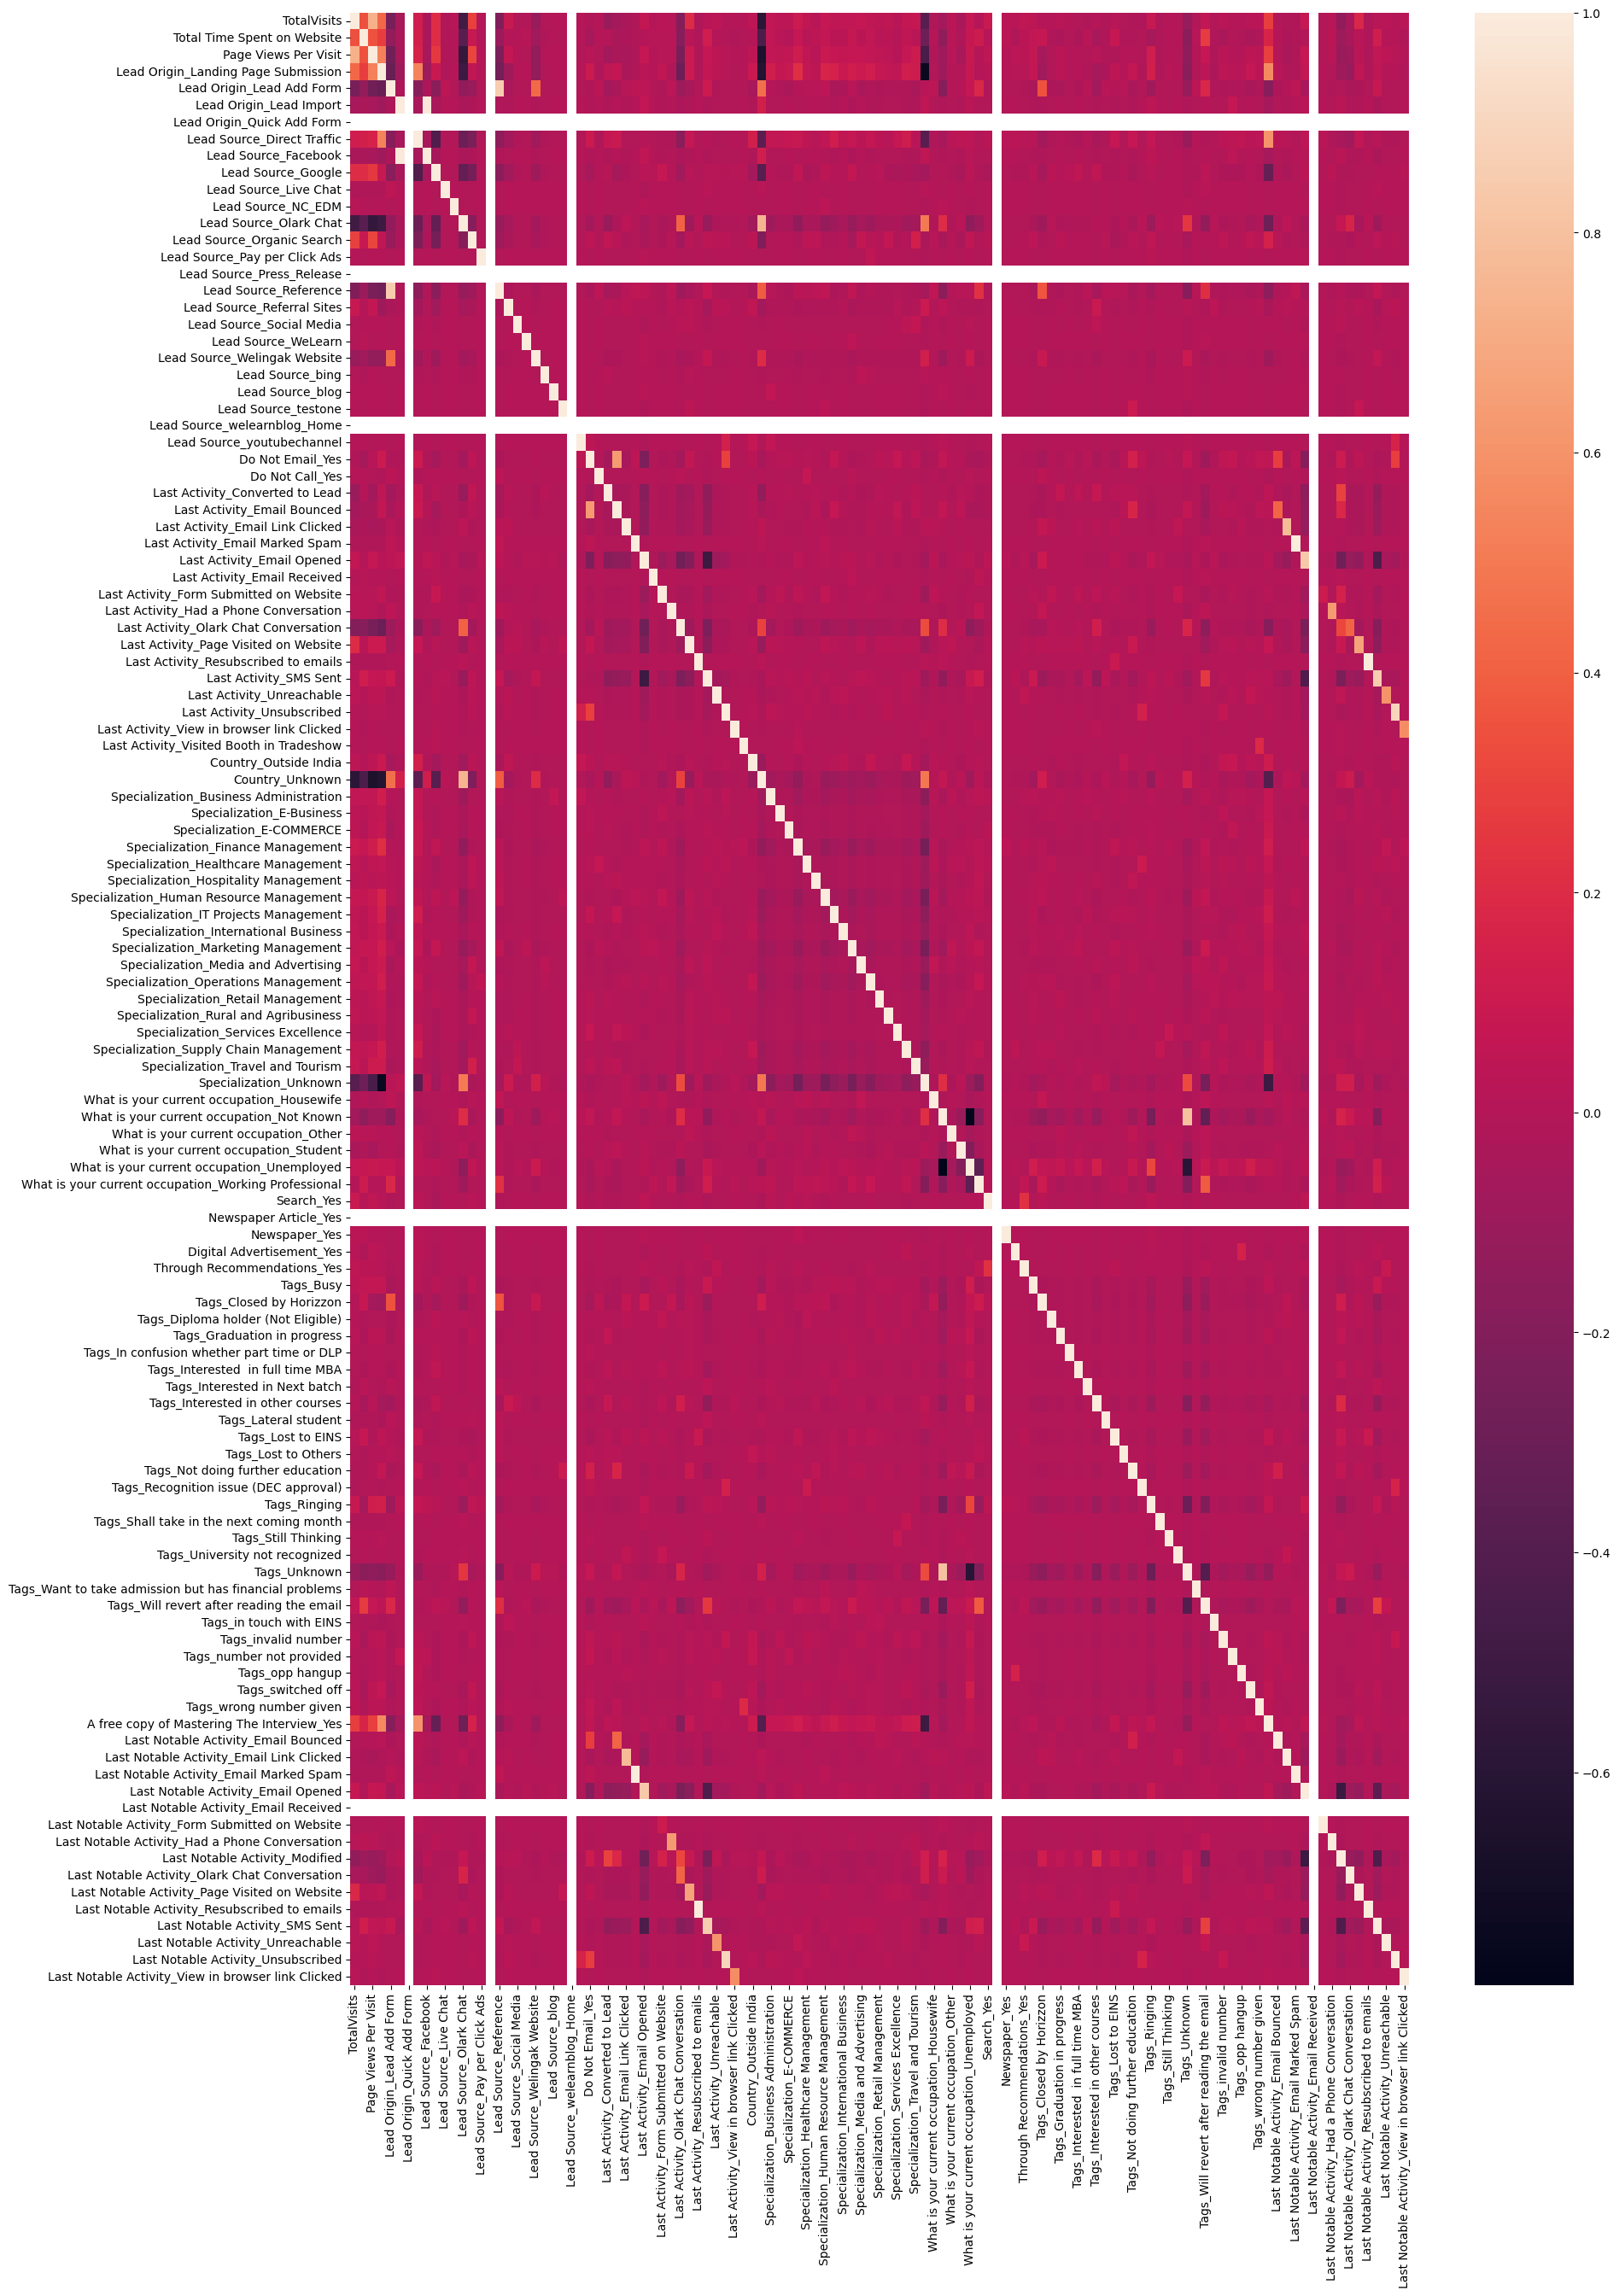

In [1201]:
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()

### MODEL BUILDING

In [1202]:
logre = LogisticRegression()

In [1203]:
rfe = RFE(logre,n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)

In [1204]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 16),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 15),
 ('Lead Origin_Landing Page Submission', False, 34),
 ('Lead Origin_Lead Add Form', False, 28),
 ('Lead Origin_Lead Import', False, 17),
 ('Lead Origin_Quick Add Form', False, 100),
 ('Lead Source_Direct Traffic', False, 62),
 ('Lead Source_Facebook', False, 36),
 ('Lead Source_Google', False, 60),
 ('Lead Source_Live Chat', False, 97),
 ('Lead Source_NC_EDM', False, 18),
 ('Lead Source_Olark Chat', False, 61),
 ('Lead Source_Organic Search', False, 88),
 ('Lead Source_Pay per Click Ads', False, 96),
 ('Lead Source_Press_Release', False, 102),
 ('Lead Source_Reference', False, 33),
 ('Lead Source_Referral Sites', False, 83),
 ('Lead Source_Social Media', False, 73),
 ('Lead Source_WeLearn', False, 94),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 87),
 ('Lead Source_blog', False, 64),
 ('Lead Source_testone', False, 95),
 ('Lead Source_welearnblog_Ho

In [1205]:
col_rfe = X_train.columns[rfe.support_]
col_rfe

Index(['Total Time Spent on Website', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced',
       'What is your current occupation_Not Known', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lateral student', 'Tags_Lost to EINS',
       'Tags_Ringing', 'Tags_Unknown',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [1206]:
col_rejec_rfe = X_train.columns[~rfe.support_]
col_rejec_rfe

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat',
       ...
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=102)

In [1207]:
X_train_rfe = X_train[col_rfe]

In [1208]:
X_train_rfe.shape

(6363, 15)

In [1209]:
## Function for Calculating VIF
def cal_vif(df):
    df1 = X_train[df]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF']= [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
    vif['VIF']= round(vif['VIF'],2)
    vif = vif.sort_values(by='VIF',ascending=False)
    return vif

In [1210]:
cal_vif(X_train_rfe.columns)

,Features,VIF
9,Tags_Unknown,4.96
3,What is your current occupation_Not Known,4.45
0,Total Time Spent on Website,1.87
10,Tags_Will revert after reading the email,1.71
14,Last Notable Activity_SMS Sent,1.58
8,Tags_Ringing,1.16
1,Lead Source_Welingak Website,1.13
5,Tags_Closed by Horizzon,1.08
4,Tags_Busy,1.07
7,Tags_Lost to EINS,1.07


#### Model-1

In [1211]:
X_train_sm1 = sm.add_constant(X_train_rfe)
logmodel_1 = sm.GLM(y_train,X_train_sm1,family= sm.families.Binomial())
res = logmodel_1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6347
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1083.5
Date:                Mon, 20 May 2024   Deviance:                       2166.9
Time:                        13:00:58   Pearson chi2:                 8.24e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6271
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -4.7207      0.224    -21.083      0.000      -5.160      -4.282
Total Time Spent on Website                   3.6074      0.241     14.955      0.000       3.135       4.080
Lead Source_Welingak Website                  4.0524      1.021      3.968      0.000       2.051       6.054
Last Activity_Email Bounced                  -2.1218      0.437     -4.854      0.000      -2.979      -1.265
What is your current occupation_Not Known    -2.7737      0.155    -17.862      0.000      -3.078      -2.469
Tags_Busy                                     2.7249      0.307      8.874      0.000       2.123       3.327
Tags_Closed by Horizzon                       8.8127      0.746     11.808      0.000       7.350      10.276
Tags_Lateral student                         28.4185   7.12e+04      0.000      1.000    -1.4e+05     1.4e+05
Tags_Lost to EINS                             9.5641      0.820     11.668      0.000       7.958      11.171
Tags_Ringing                                 -1.9188      0.346     -5.539      0.000      -2.598      -1.240
Tags_Unknown                                  4.0960      0.242     16.921      0.000       3.622       4.570
Tags_Will revert after reading the email      6.6083      0.259     25.494      0.000       6.100       7.116
Tags_invalid number                         -21.8503   1.54e+04     -0.001      0.999   -3.02e+04    3.01e+04
Tags_switched off                            -2.2721      0.765     -2.968      0.003      -3.772      -0.772
Tags_wrong number given                     -22.3369   2.12e+04     -0.001      0.999   -4.15e+04    4.15e+04
Last Notable Activity_SMS Sent                2.7537      0.146     18.924      0.000       2.468       3.039
=============================================================================================================
"""

In [1212]:
X_train_rfe.drop('Tags_Lateral student',axis=1,inplace=True)

In [1213]:
cal_vif(X_train_rfe.columns)

,Features,VIF
8,Tags_Unknown,4.96
3,What is your current occupation_Not Known,4.45
0,Total Time Spent on Website,1.87
9,Tags_Will revert after reading the email,1.71
13,Last Notable Activity_SMS Sent,1.58
7,Tags_Ringing,1.16
1,Lead Source_Welingak Website,1.13
5,Tags_Closed by Horizzon,1.08
4,Tags_Busy,1.07
6,Tags_Lost to EINS,1.07


#### Model-2

In [1214]:
X_train_sm2 = sm.add_constant(X_train_rfe)
logmodel_2 = sm.GLM(y_train,X_train_sm2,family= sm.families.Binomial())
res = logmodel_2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6348
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1093.8
Date:                Mon, 20 May 2024   Deviance:                       2187.7
Time:                        13:00:58   Pearson chi2:                 8.25e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6258
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -4.5952      0.214    -21.452      0.000      -5.015      -4.175
Total Time Spent on Website                   3.5669      0.240     14.886      0.000       3.097       4.037
Lead Source_Welingak Website                  4.0470      1.021      3.963      0.000       2.045       6.049
Last Activity_Email Bounced                  -2.1203      0.436     -4.863      0.000      -2.975      -1.266
What is your current occupation_Not Known    -2.7698      0.155    -17.865      0.000      -3.074      -2.466
Tags_Busy                                     2.6090      0.301      8.671      0.000       2.019       3.199
Tags_Closed by Horizzon                       8.6912      0.744     11.689      0.000       7.234      10.148
Tags_Lost to EINS                             9.4430      0.816     11.567      0.000       7.843      11.043
Tags_Ringing                                 -2.0322      0.341     -5.957      0.000      -2.701      -1.364
Tags_Unknown                                  3.9764      0.234     17.021      0.000       3.519       4.434
Tags_Will revert after reading the email      6.4890      0.251     25.822      0.000       5.997       6.982
Tags_invalid number                         -21.9697   1.54e+04     -0.001      0.999   -3.02e+04    3.01e+04
Tags_switched off                            -2.3876      0.763     -3.130      0.002      -3.883      -0.893
Tags_wrong number given                     -22.4513   2.12e+04     -0.001      0.999   -4.15e+04    4.15e+04
Last Notable Activity_SMS Sent                2.7577      0.145     19.013      0.000       2.473       3.042
=============================================================================================================
"""

In [1215]:
X_train_rfe.drop('Tags_invalid number',axis=1,inplace=True)

In [1216]:
cal_vif(X_train_rfe.columns)

,Features,VIF
8,Tags_Unknown,4.96
3,What is your current occupation_Not Known,4.45
0,Total Time Spent on Website,1.86
9,Tags_Will revert after reading the email,1.70
12,Last Notable Activity_SMS Sent,1.57
7,Tags_Ringing,1.15
1,Lead Source_Welingak Website,1.13
5,Tags_Closed by Horizzon,1.08
4,Tags_Busy,1.07
6,Tags_Lost to EINS,1.07


#### Model-3

In [1217]:
X_train_sm3 = sm.add_constant(X_train_rfe)
logmodel_3 = sm.GLM(y_train,X_train_sm3,family= sm.families.Binomial())
res = logmodel_3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6349
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1098.1
Date:                Mon, 20 May 2024   Deviance:                       2196.1
Time:                        13:00:58   Pearson chi2:                 8.27e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6253
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -4.7337      0.214    -22.086      0.000      -5.154      -4.314
Total Time Spent on Website                   3.5939      0.239     15.006      0.000       3.124       4.063
Lead Source_Welingak Website                  4.0487      1.021      3.965      0.000       2.047       6.050
Last Activity_Email Bounced                  -2.1277      0.436     -4.876      0.000      -2.983      -1.272
What is your current occupation_Not Known    -2.7652      0.155    -17.879      0.000      -3.068      -2.462
Tags_Busy                                     2.7585      0.299      9.234      0.000       2.173       3.344
Tags_Closed by Horizzon                       8.8275      0.744     11.870      0.000       7.370      10.285
Tags_Lost to EINS                             9.5737      0.817     11.715      0.000       7.972      11.175
Tags_Ringing                                 -1.8654      0.338     -5.525      0.000      -2.527      -1.204
Tags_Unknown                                  4.1167      0.233     17.652      0.000       3.660       4.574
Tags_Will revert after reading the email      6.6266      0.251     26.364      0.000       6.134       7.119
Tags_switched off                            -2.2186      0.761     -2.915      0.004      -3.710      -0.727
Tags_wrong number given                     -21.2849   1.29e+04     -0.002      0.999   -2.52e+04    2.52e+04
Last Notable Activity_SMS Sent                2.7128      0.143     18.999      0.000       2.433       2.993
=============================================================================================================
"""

In [1218]:
X_train_rfe.drop('Tags_wrong number given',axis=1,inplace=True)

In [1219]:
cal_vif(X_train_rfe.columns)

,Features,VIF
8,Tags_Unknown,4.96
3,What is your current occupation_Not Known,4.44
0,Total Time Spent on Website,1.86
9,Tags_Will revert after reading the email,1.70
11,Last Notable Activity_SMS Sent,1.56
7,Tags_Ringing,1.15
1,Lead Source_Welingak Website,1.13
5,Tags_Closed by Horizzon,1.08
4,Tags_Busy,1.07
6,Tags_Lost to EINS,1.07


#### Model-4

In [1220]:
X_train_sm4 = sm.add_constant(X_train_rfe)
logmodel_4 = sm.GLM(y_train,X_train_sm4,family= sm.families.Binomial())
res = logmodel_4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6350
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1101.1
Date:                Mon, 20 May 2024   Deviance:                       2202.1
Time:                        13:00:58   Pearson chi2:                 8.28e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6250
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -4.8191      0.216    -22.350      0.000      -5.242      -4.396
Total Time Spent on Website                   3.5918      0.239     15.013      0.000       3.123       4.061
Lead Source_Welingak Website                  4.0472      1.021      3.964      0.000       2.046       6.049
Last Activity_Email Bounced                  -2.1308      0.436     -4.885      0.000      -2.986      -1.276
What is your current occupation_Not Known    -2.7601      0.154    -17.889      0.000      -3.062      -2.458
Tags_Busy                                     2.8564      0.298      9.588      0.000       2.273       3.440
Tags_Closed by Horizzon                       8.9133      0.744     11.980      0.000       7.455      10.372
Tags_Lost to EINS                             9.6557      0.818     11.810      0.000       8.053      11.258
Tags_Ringing                                 -1.7546      0.336     -5.225      0.000      -2.413      -1.096
Tags_Unknown                                  4.2063      0.234     17.993      0.000       3.748       4.664
Tags_Will revert after reading the email      6.7144      0.252     26.633      0.000       6.220       7.209
Tags_switched off                            -2.1073      0.760     -2.772      0.006      -3.597      -0.617
Last Notable Activity_SMS Sent                2.6838      0.142     18.959      0.000       2.406       2.961
=============================================================================================================
"""

#### Prediction

In [1221]:
y_train_pred = res.predict(X_train_sm4)

In [1222]:
y_train_pred = y_train_pred.values.reshape(-1)

In [1223]:
y_train_pred_f = pd.DataFrame({'Converted':y_train.values,'Conversion_Probability':y_train_pred})

In [1224]:
y_train_pred_f['Lead Index'] = y_train.index

In [1225]:
y_train_pred_f['Lead Score']= y_train_pred_f['Conversion_Probability']*100

In [1226]:
## Consider Threshold as 0.5
y_train_pred_f['Predicted_Value']= y_train_pred_f.Conversion_Probability.map(lambda x: 1 if x>0.5 else 0)

In [1227]:
y_train_pred_f.head()

,Converted,Conversion_Probability,Lead Index,Lead Score,Predicted_Value
0,1,0.990475,1562,99.047494,1
1,1,0.955176,6112,95.517553,1
2,0,0.033154,478,3.315443,0
3,1,0.869364,1406,86.936441,1
4,0,0.010610,7746,1.060990,0


### Model Evaluation with cutoff as 0.5

In [1228]:
confusion = metrics.confusion_matrix(y_train_pred_f.Converted,y_train_pred_f.Predicted_Value)
confusion

array([[3813,  140],
       [ 259, 2151]], dtype=int64)

In [1229]:
print("Accuracy of the model is:",round(metrics.accuracy_score(y_train_pred_f.Converted,y_train_pred_f.Predicted_Value)*100,2),"%")

Accuracy of the model is: 93.73 %


In [1230]:
#True Positive
TP = confusion[1,1]
#True Negative
TN = confusion[0,0]
# False Positive
FP = confusion[0,1]
# False Negative
FN = confusion[1,0]

In [1231]:
## Calculating Senstivitiy
print("Sensitivity is :", round(TP/(TP+FN)*100,2),"%")

Sensitivity is : 89.25 %


In [1232]:
## Calculating Specificity
print("Specificity is :", round(TN/(TN+FP)*100,2),"%")

Specificity is : 96.46 %


### ROC Curve

In [1233]:
## Roc Curve Function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [1234]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_f.Converted,y_train_pred_f.Predicted_Value, drop_intermediate = False )

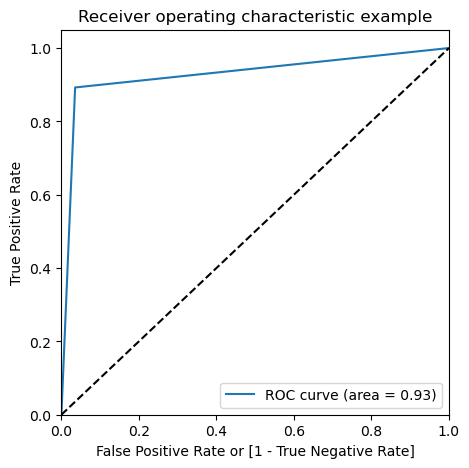

In [1235]:
draw_roc(y_train_pred_f.Converted,y_train_pred_f.Predicted_Value)

We can see that area under curve of ROC is 0.93 which indicates that it is a very good predictive model

In [1236]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_f[i]=y_train_pred_f.Conversion_Probability.map(lambda x: 1 if x>i else 0)
y_train_pred_f.head()

,Converted,Conversion_Probability,Lead Index,Lead Score,Predicted_Value,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.990475,1562,99.047494,1,1,1,1,1,1,1,1,1,1,1
1,1,0.955176,6112,95.517553,1,1,1,1,1,1,1,1,1,1,1
2,0,0.033154,478,3.315443,0,1,0,0,0,0,0,0,0,0,0
3,1,0.869364,1406,86.936441,1,1,1,1,1,1,1,1,1,1,0
4,0,0.010610,7746,1.060990,0,1,0,0,0,0,0,0,0,0,0


In [1237]:
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    cm1= metrics.confusion_matrix(y_train_pred_f.Converted,y_train_pred_f[i])
    total1= sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    
    cutoff_df.loc[i]=[i,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.378752  1.000000  0.000000
0.1   0.1  0.897533  0.975104  0.850240
0.2   0.2  0.921264  0.954357  0.901088
0.3   0.3  0.931479  0.944813  0.923349
0.4   0.4  0.933208  0.904149  0.950923
0.5   0.5  0.937294  0.892531  0.964584
0.6   0.6  0.937137  0.882573  0.970402
0.7   0.7  0.933522  0.867635  0.973691
0.8   0.8  0.925664  0.836515  0.980015
0.9   0.9  0.882288  0.708299  0.988363


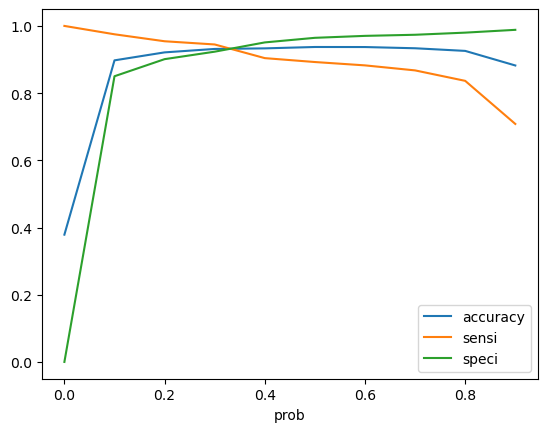

In [1238]:
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])
plt.show()

In [1239]:
## The optimal cutoff seems to be around 0.35 
## Creating new column of predicted values using cutoff of 0.35

In [1240]:
y_train_pred_f['Final_Predicted'] = y_train_pred_f.Conversion_Probability.map(lambda x: 1 if x>0.35 else 0)

In [1241]:
y_train_pred_f.head()

,Converted,Conversion_Probability,Lead Index,Lead Score,Predicted_Value,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,1,0.990475,1562,99.047494,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.955176,6112,95.517553,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.033154,478,3.315443,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.869364,1406,86.936441,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.010610,7746,1.060990,0,1,0,0,0,0,0,0,0,0,0,0


In [1242]:
print("Accuracy of the model with 0.35 as threshold is:",round(metrics.accuracy_score(y_train_pred_f.Converted,y_train_pred_f.Final_Predicted)*100,2),"%")

Accuracy of the model with 0.35 as threshold is: 93.09 %


In [1243]:
confusion_2 = metrics.confusion_matrix(y_train_pred_f.Converted,y_train_pred_f.Final_Predicted)
confusion_2

array([[3673,  280],
       [ 160, 2250]], dtype=int64)

In [1244]:
#True Positive
TP = confusion_2[1,1]
#True Negative
TN = confusion_2[0,0]
# False Positive
FP = confusion_2[0,1]
# False Negative
FN = confusion_2[1,0]

In [1272]:
## Calculating Specificity and Specificity
print("Sensitivity with threshold as 0.35 is :", round(TP/(TP+FN)*100,2),"%")
print("Specificity with threshold as 0.35 is :", round(TN/(TN+FP)*100,2),"%")

Sensitivity with threshold as 0.35 is : 91.52 %
Specificity with threshold as 0.35 is : 92.2 %


### Precision-Recall

In [1275]:
print("Precision with threshold as 0.35 is :", round(precision_score(y_train_pred_f.Converted,y_train_pred_f.Final_Predicted)*100,2),"%")
print("Recall with threshold as 0.35 is :", round(recall_score(y_train_pred_f.Converted,y_train_pred_f.Final_Predicted)*100,2),"%")

Precision with threshold as 0.35 is : 88.93 %
Recall with threshold as 0.35 is : 93.36 %


Recall with threshold as 0.35 is : 93.36 %


In [1249]:
p,r,thresholds = precision_recall_curve(y_train_pred_f.Converted,y_train_pred_f.Conversion_Probability)

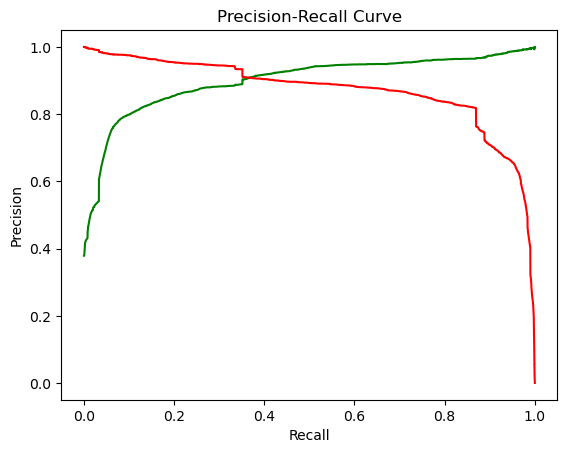

In [1276]:
plt.plot(thresholds,p[:-1],"g-")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.plot(thresholds,r[:-1],"r-")
plt.show()

### Predictions on Test Set

In [1251]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2101,5.0,1656,5.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
647,3.0,312,3.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3765,3.0,131,3.0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
5590,3.0,871,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1027,2.0,235,2.0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [1252]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]= scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [1253]:
X_test = X_test[X_train_rfe.columns]

In [1254]:
X_test_sm = sm.add_constant(X_test)

In [1255]:
y_test_pred = res.predict(X_test_sm)

In [1256]:
y_test_pred = pd.DataFrame(y_test_pred)

In [1257]:
y_test = pd.DataFrame(y_test)
y_test['Lead Index'] = y_test.index

In [1258]:
y_test_pred.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True,inplace=True)

In [1259]:
y_test_final = pd.concat([y_test,y_test_pred],axis=1)

In [1260]:
y_test_final.head()

,Converted,Lead Index,0
0,1,2101,0.999268
1,1,647,0.916273
2,1,3765,0.993603
3,0,5590,0.031356
4,1,1027,0.906361


In [1261]:
y_test_final = y_test_final.rename(columns={0:'Conversion_Prob'})

In [1262]:
y_test_final['Final_Prediction']= y_test_final.Conversion_Prob.map(lambda x: 1 if x>0.35 else 0)

In [1273]:
y_test_final['Lead Score'] = y_test_final['Conversion_Prob']*100

In [1274]:
y_test_final.head()

,Converted,Lead Index,Conversion_Prob,Final_Prediction,Lead Score
0,1,2101,0.999268,1,99.926817
1,1,647,0.916273,1,91.627289
2,1,3765,0.993603,1,99.360268
3,0,5590,0.031356,0,3.135582
4,1,1027,0.906361,1,90.636140


In [1264]:
print("Accuracy of the test set is:",round(metrics.accuracy_score(y_test_final.Converted,y_test_final.Final_Prediction)*100,2),"%")

Accuracy of the test set is: 91.93 %


In [1265]:
confusion_3 = metrics.confusion_matrix(y_test_final.Converted,y_test_final.Final_Prediction)
confusion_3

array([[1514,  128],
       [  92,  993]], dtype=int64)

In [1266]:
#True Positive
TP = confusion_3[1,1]
#True Negative
TN = confusion_3[0,0]
# False Positive
FP = confusion_3[0,1]
# False Negative
FN = confusion_3[1,0]

In [1271]:
print("Sensitivity of test set is :", round(TP/(TP+FN)*100,2),"%")
print("Specificity of test set is :", round(TN/(TN+FP)*100,2),"%")
print("Precision of test set is :", round(precision_score(y_test_final.Converted,y_test_final.Final_Prediction)*100,2),"%")
print("Recall of test set is :", round(recall_score(y_test_final.Converted,y_test_final.Final_Prediction)*100,2),"%")

Sensitivity of test set is : 91.52 %
Specificity of test set is : 92.2 %
Precision of test set is : 88.58 %
Recall of test set is : 91.52 %


Final Log Model:

ln (p/(1-p)) = -4.8191 + 3.5918 * Total Time Spent on Website + 4.0472 * Lead Source_Welingak Website
-2.1308 * Last Activity_Email Bounced -2.7601 * What is your current occupation_Not Known + 2.8564 * Tags_Busy +8.9133 * Tags_Closed by Horizzon +9.6557 * Tags_Lost to EINS - 1.7546 * Tags_Ringing + 4.2063 * Tags_Unknown
-6.7144 * Tags_Will revert after reading the email -2.1073 * Tags_switched off + 2.6838 * Last Notable Activity_SMS Sent